# Introduction:

This tutorial demonstrates a the building block of neural network: perceptron, implemented in Python and Pytorch. The contents are for educational purpose. 

This tutorial was accomplished with the help of the following references. 

# References:
[1] Perceptron in Python using NumPy and PyTorchPerceptron in Python using NumPy and PyTorch. (https://youtu.be/TlGpIKMVoOg?si=f2e3n7uZ8PDNwgZZhttps://youtu.be/TlGpIKMVoOg?si=f2e3n7uZ8PDNwgZZ)

# Environment setup

In [1]:
# allow modules automatically reloaded when this notebook is rerun
%load_ext autoreload
%autoreload 2

%load_ext watermark
%watermark -a 'Chang' -v -p torch

%matplotlib inline

Author: Chang

Python implementation: CPython
Python version       : 3.9.16
IPython version      : 8.14.0

torch: 2.0.1



# Import modules

In [2]:
# import modules
import numpy as np
import torch
import matplotlib.pyplot as plt

# Create a toy dataset

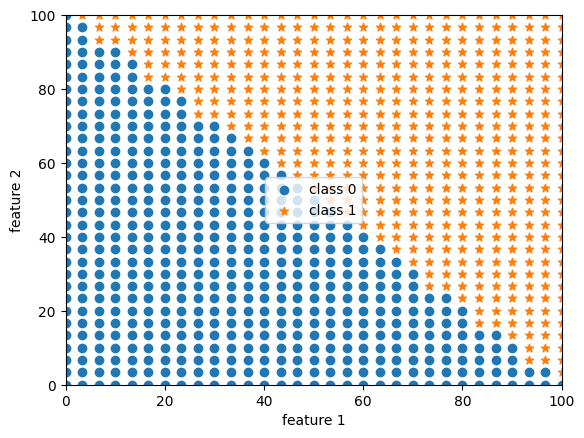

In [3]:
# coordinates of two features
x1 = np.linspace(0, 100, 31) # can us np.arange() as well
x2 = np.linspace(0, 100, 31)
# full coordinate arrays
xx1, xx2 = np.meshgrid(x1, x2)
# feature values
y = ((xx1 + xx2) > 100 ) * 1.0

# reorganize the data points
X = np.vstack((xx1.flatten(), xx2.flatten())).transpose()
y = y.flatten()

plt.scatter(X[y==0, 0], X[y==0, 1], label='class 0', marker='o')
plt.scatter(X[y==1, 0], X[y==1, 1], label='class 1', marker='*')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.legend()
plt.show()

# Perturb the data with additive noise

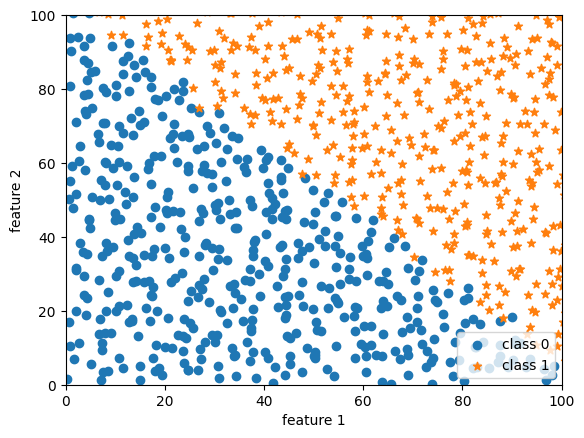

In [4]:
X += np.random.rand(X.shape[0],X.shape[1])*5
plt.scatter(X[y==0, 0], X[y==0, 1], label='class 0', marker='o')
plt.scatter(X[y==1, 0], X[y==1, 1], label='class 1', marker='*')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.legend(loc="lower right")
plt.show()

# Shuffle the data points

In [5]:
# Shuffling & train/test split
shuffle_idx = np.arange(y.shape[0])
rand_generator = np.random.RandomState(123)
rand_generator.shuffle(shuffle_idx)
X, y = X[shuffle_idx], y[shuffle_idx]

# Split data into training and test sets

In [6]:
num_train = int(0.75*y.shape[0])
print(f"There are {num_train} data points")

X_train = X[0:num_train,:]
X_test = X[num_train:-1,:]
y_train = y[0:num_train]
y_test = y[num_train:-1]

There are 720 data points


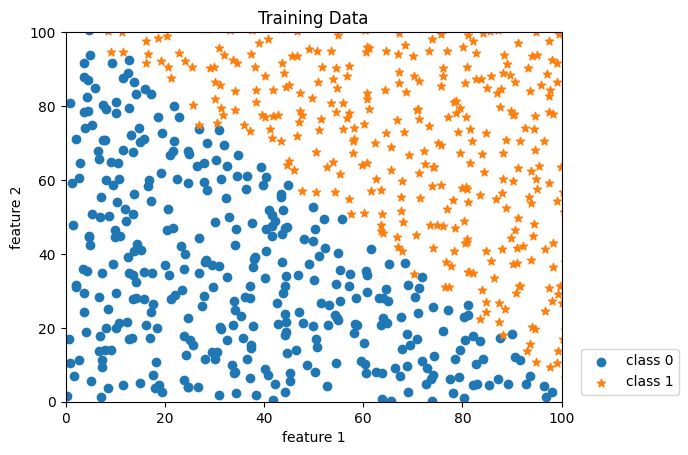

In [7]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='*')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.legend(bbox_to_anchor=(1.25, 0), loc="lower right")
plt.title("Training Data")
plt.show()

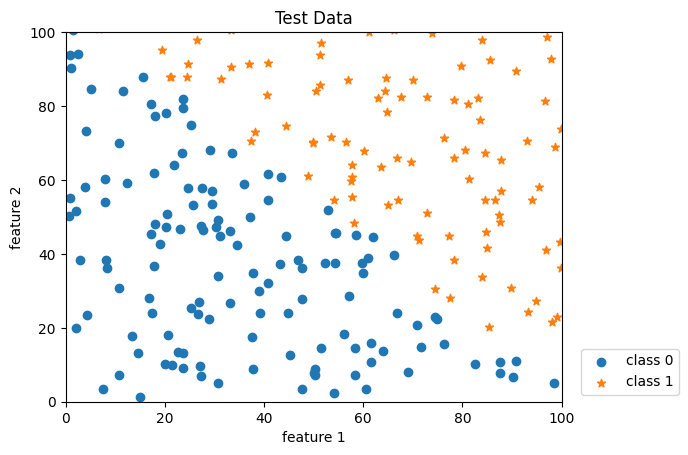

In [8]:
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='*')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.legend(bbox_to_anchor=(1.25, 0), loc="lower right")
plt.title("Test Data")
plt.show()

# Defining the perceptron model

In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = torch.zeros(num_features, 1, dtype=torch.float32, device=device)
        self.bias = torch.zeros(1, dtype=torch.float32, device=device)
        
        # placeholder vectors so they don't
        # need to be recreated each time
        self.ones = torch.ones(1, device=device)
        self.zeros = torch.zeros(1, device=device)

    def forward(self, x):
        linear = torch.mm(x, self.weights) + self.bias
        predictions = torch.where(linear > 0., self.ones, self.zeros)
        return predictions
        
    def backward(self, x, y):  
        predictions = self.forward(x)
        errors = y - predictions
        return errors
        
    def train(self, x, y, epochs):
        for e in range(epochs):
            for i in range(y.shape[0]):
                # use view because backward expects a matrix (i.e., 2D tensor)
                errors = self.backward(x[i].reshape(1, self.num_features), y[i]).reshape(-1)
                self.weights += (errors * x[i]).reshape(self.num_features, 1)
                self.bias += errors
                
    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy = torch.sum(predictions == y).float() / y.shape[0]
        return accuracy

In [10]:
device

device(type='cuda', index=0)

# Train the perceptron

In [17]:
num_features = 2
num_epochs = 1000
X_train_tensor = torch.tensor(X_train, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32, device=device)

model = Perceptron(num_features=num_features)

model.train(X_train_tensor, y_train_tensor, epochs=num_epochs)

print('Model parameters:')
print('  Weights: %s' % model.weights)
print('  Bias: %s' % model.bias)

Model parameters:
  Weights: tensor([[130.8529],
        [176.8563]], device='cuda:0')
  Bias: tensor([-17671.], device='cuda:0')


# Evalaute the model using the test data

In [18]:
X_test_tensor = torch.tensor(X_test, dtype=torch.float32, device=device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32, device=device)

accuracy = model.evaluate(X_test_tensor, y_test_tensor)

print(f'Model performance: {accuracy}')


Model performance: 0.9125000238418579


# Plot the decision boundary derived from the perceptron

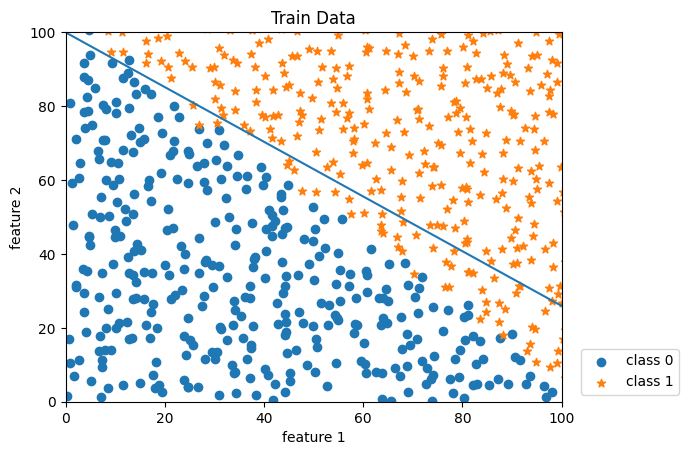

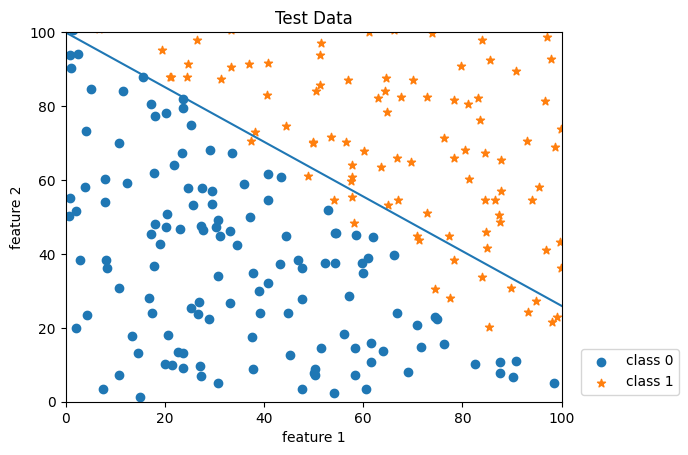

In [19]:
w, b = model.weights, model.bias
w = w.detach().cpu()
b = b.detach().cpu()

x0_min = 0
x1_min = ( (-(w[0] * x0_min) - b[0]) / w[1] )

x0_max = 100
x1_max = ( (-(w[0] * x0_max) - b[0]) / w[1] )


plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='*')
plt.plot([x0_min, x0_max], [x1_min, x1_max])
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.legend(bbox_to_anchor=(1.25, 0), loc="lower right")
plt.title("Train Data")
plt.show()



plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='*')
plt.plot([x0_min, x0_max], [x1_min, x1_max])
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.legend(bbox_to_anchor=(1.25, 0), loc="lower right")
plt.title("Test Data")
plt.show()
